#  Predicting heart disease using machine learning

This notebook looks into using python-based machine learning and data science libraries in an attempt to build learning model capable of predicting whether or not someone has heart disease based on their medical records.

We're going to take the following approach:
> - Problem definition.
- Data
- Evaluation
- Features
- Modelling
- Experimentation

## 1. Problem Definition

> Given clinical parameters about a patient, can we predict wheiter or not the have heart disease?

## 2. Data
> The original data came from the Cleavland data from the UCI Machine Learning Repository. http://archive.ics.uci.edu/ml/datasets/Heart+Disease.

> Another can be found on the Kaggle website. https://www.kaggle.com/ronitf/heart-disease-uci

## 3. Evaluation
> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept , we'll pursue the project.

## 4. Features
This is where you'll get different information about the features in the dataset.

**Creating a data dictionary**
> * age : age in years
* sex : (1 = male; 0 = female)
* cp : chest pain type
* trestbps : resting blood pressure (in mm Hg on admission to the hospital)
* cholserum : cholestoral in mg/dl
* fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restecg : resting electrocardiographic results
* thalach : maximum heart rate achieved
* exang : exercise induced angina (1 = yes; 0 = no)
* oldpeakST : depression induced by exercise relative to rest
* slope : the slope of the peak exercise ST segment
* ca : number of major vessels (0-3) colored by flourosopy
* thal3 = normal; 6 = fixed defect; 7 = reversable defect
* target : 1 or 0 



#  

# Preparing the tools
We're going to use pandas, matplotlib and numpy  for data analysis and manipulation, while scikit-learn would be used to build our models

In [1]:
%matplotlib inline

In [2]:
# importing analysis tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

# model estimators
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# model evaluation function 
from sklearn.model_selection import (train_test_split, cross_val_score,
                                     RandomizedSearchCV, GridSearchCV)
from sklearn.metrics import (confusion_matrix, classification_report,
                             precision_score, recall_score, f1_score, plot_roc_curve)

# Loading the data

In [3]:
df = pd.read_csv('data/heart-disease.csv')
df.shape #(row, columns)

(303, 14)

## Exploratory data analysis ( looking at the data)
Exploring the data to find useful insights

**check list**
> * What question(s) are we trying to solve
* What kind of data do we have and how do we treat different types?
* What's missing from the data and how do we deal with it?
* Where are the outliers and why should we care about them ?
* How can we add, change or remove features to get more out of the data?

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
# how many classes are there
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

The number of target class shows that the classes are balanced

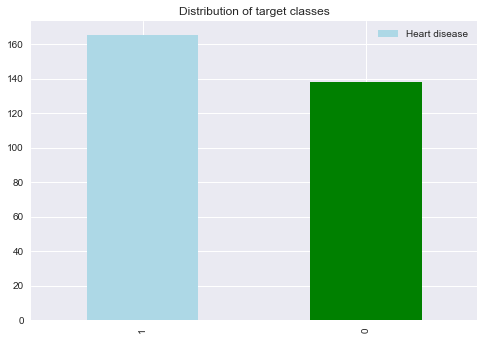

In [7]:
# ploting the target attribute class
plt.title('Distribution of target classes')
df['target'].value_counts().plot(kind='bar', color=['lightblue', 'green'],
                                 label='Heart disease')
plt.legend()
plt.show()

In [8]:
# information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
# find amount of missing data
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

No missing values in the dataset

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


####  Plotting figures of different targets against the target

#####  Heart disease frequency according to sex

In [11]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [12]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


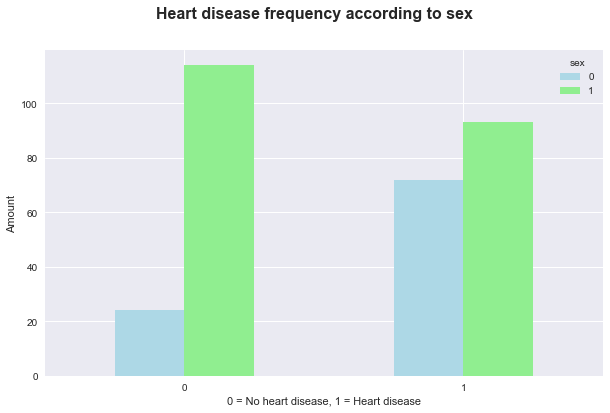

In [13]:
# plotting the sex and target values 
pd.crosstab(df.target, df.sex).plot(kind='bar',
                                    figsize=(10, 6),
                                    color=['lightblue','lightgreen'])
plt.xlabel('0 = No heart disease, 1 = Heart disease')
plt.ylabel('Amount')
plt.xticks(rotation=0)
plt.suptitle('Heart disease frequency according to sex', fontsize=16, fontweight='bold')
plt.show()

In [14]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#####  Checking if Age and Thalach (max heart) contribute to heart disease

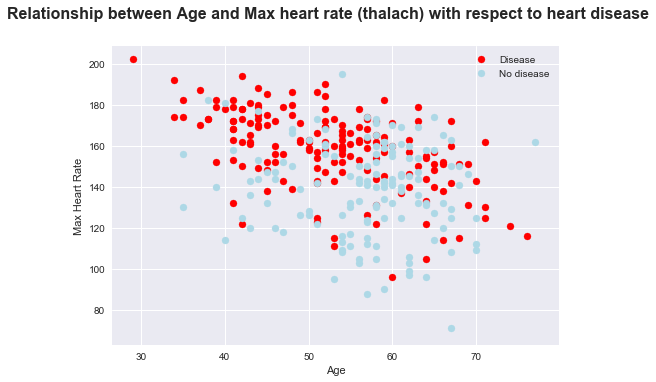

In [15]:
#plotting age against thalach for but class of the dataset

# features with heart disease
x = df.age[df['target']==1]
y = df.thalach[df['target'] == 1]

# features without heart disease
x1 = df.age[df['target']== 0]
y1 = df.thalach[df['target'] == 0]

plt.scatter(x, y, color='red')
plt.scatter(x1, y1, color='lightblue')
plt.suptitle('Relationship between Age and Max heart rate (thalach) with respect to heart disease',
            fontsize=16, fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease', 'No disease'])
plt.show()

#####  Checking the distribution of the age

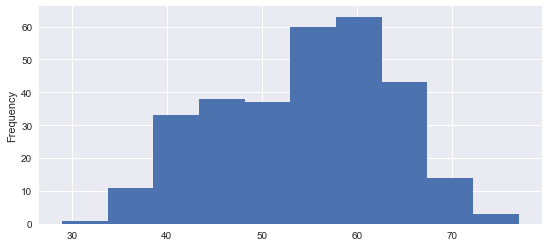

In [16]:
df.age.plot.hist(figsize=(9, 4))
plt.show()

In [17]:
# relationship between chest pain (cp) and heart disease
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


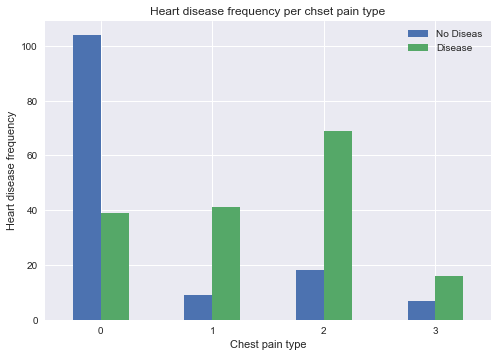

In [18]:
# plot it out 
pd.crosstab(df.cp, df.target).plot.bar()
plt.title('Heart disease frequency per chset pain type')
plt.xlabel('Chest pain type')
plt.ylabel('Heart disease frequency')
plt.xticks(rotation=0)
plt.legend(['No Diseas' ,'Disease'])
plt.show()

#####  Checking for Correlation inside the data

In [19]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
# Building a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


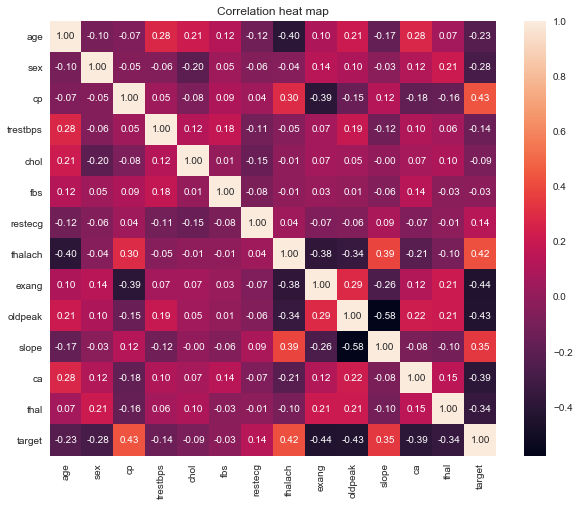

In [21]:
# plotting the correlation on a heat map

correlation_mat = df.corr()

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlation_mat,
                 annot=True, 
                 fmt='.2f'
                )
plt.title('Correlation heat map')
plt.show()

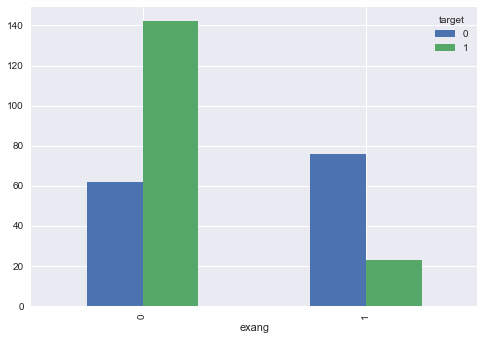

In [22]:
pd.crosstab(df.exang, df.target).plot.bar();

# 5. Modeling

In [23]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [24]:
# splitting into features and label
X = df.drop('target', axis=1)
y = df['target']

In [25]:
# split into train and test sets
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [26]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


**Machine learning models to use**
>- Logistic Regression
- K-Nearest Neighbours Classifier
- Randon Forest Classifier


In [27]:
# making a dictionary of the models

models = {
    'Logistic regression' : LogisticRegression(),
    'KNN' : KNeighborsClassifier(),
    'Random forest' : RandomForestClassifier()
}

def fitScoreModel(models, X_train, y_train, X_test,y_test):
    ''' 
    This function helps fit and score the model, the score and respective model are 
    stored in a dictionary.
    Function returns a dictionary of score and model's name
    models : The machine learning estimator in use (dictionary)
    X_train : training data no label
    y_train : training label
    X_test : testing data no labels
    y_test : test label
    '''
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        # fit the models
        model.fit(X_train, y_train)
        # evaluate the score of the model and add to the model score dictionary
        model_scores[name] = model.score(X_test, y_test)
    return model_scores
        

In [28]:
model_score = fitScoreModel(models, X_train, y_train, X_test, y_test)
model_score

/home/eclipse/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'Logistic regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random forest': 0.8360655737704918}

####  Comparing the models 
**[Go back](#Note) [2](#Note2)**

In [29]:
model_compare = pd.DataFrame(model_score, index=['Accuracy'])
model_compare

,Logistic regression,KNN,Random forest
Accuracy,0.885246,0.688525,0.836066


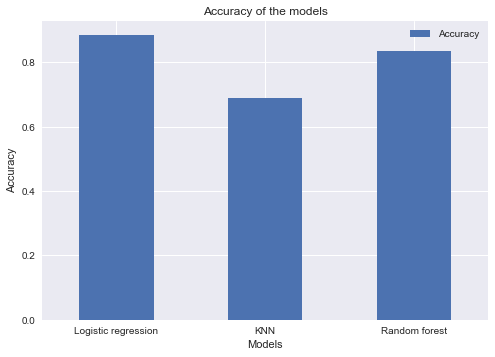

In [30]:
# plotting th models on a graph
model_compare.T.plot.bar(label='Accuracy')
plt.title('Accuracy of the models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.legend()
plt.xticks(rotation=0)
plt.show()

# 6. Evaluating the model
**Working through the models with the following experiments**
> - Hyperparameter tuning
- Feature importance
- Confusion matrix
- Cross-validation
- Precision
- Recall
- F1 score
- Classification report 
- ROC curve
- Area under the curve (AUC)

## Hyperparameter Tuning

In [31]:
train_scores = []
test_scores = []

knn = KNeighborsClassifier()
neighbors = np.arange(1, 21)

for neighbor in neighbors:
    knn.set_params(n_neighbors=neighbor)
    # fitting the model
    knn.fit(X_train , y_train)
    # train set scores
    train_scores.append(knn.score(X_train, y_train))
    # test sert score 
    test_scores.append(knn.score(X_test, y_test))
    

In [32]:
train_scores[:5]

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967]

In [33]:
test_scores[:5]

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344]

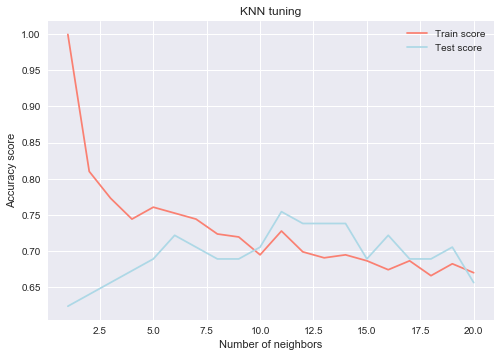

The maximum accuracy score on the test set : 75.41% at [11] neighbors


In [34]:
# plotting the the train and test score for the knn hyperparameter tuning
plt.plot(neighbors, train_scores, label='Train score', color='salmon')
plt.plot(neighbors, test_scores, label='Test score', color='lightblue')
plt.title('KNN tuning')
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy score')
plt.legend()
plt.show()

max_neighbor = [index for index, value in zip(neighbors, test_scores) 
                if np.max(value) == np.max(test_scores)]
print(f'The maximum accuracy score on the test set : {np.max(test_scores)* 100:.2f}% at {max_neighbor} neighbors')

###### Note
From the graph above the `KNeighborsClassifier` would not be a good estimator for the dataset, at 75.41% after `hyperparameter tuning` it's still lower than both the `LogisticRegression` and `RandomForestClassifier` **[baseline score](#Comparing-the-models)**.

#### Hyperparameter tuning using RandomizedSearchCV

In [35]:
# hyperparamter grid for both logistic regression and random forest classifier
log_reg_grid = {'C': np.logspace(-4, 4, 20),
               'solver':['liblinear']
               }
rf_grid = {'n_estimators':np.arange(10, 1000, 50),
           'max_depth' :[None, 3, 5, 10], 
           'min_samples_split' : np.arange(2, 20, 2),
           'min_samples_leaf': np.arange(1, 20, 2)
          }


Tuning LogisticRegression

In [36]:
np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv = 5, 
                               n_iter=20,
                               verbose=True)
#fit model hyperparameter
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.1s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [37]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [38]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

Tuning RandomForestClassifier

In [39]:
rs_rf = RandomizedSearchCV(RandomForestClassifier(), param_distributions=rf_grid,
                          cv=5, 
                          verbose=True, 
                          n_iter=20)
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.7min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [40]:
# Best paramters
rs_rf.best_params_

{'n_estimators': 360,
 'min_samples_split': 4,
 'min_samples_leaf': 15,
 'max_depth': 5}

In [41]:
rs_rf.score(X_test, y_test)

0.8688524590163934

#### Scores after Hyper tuning
**[Go back](#Note2)**

In [42]:
data = {'Logistic regression': rs_log_reg.score(X_test, y_test), 
       'Random Forest':rs_rf.score(X_test, y_test)
       }

hyper_model = pd.DataFrame(data, index=['Accuracy'])
hyper_model

,Logistic regression,Random Forest
Accuracy,0.885246,0.868852


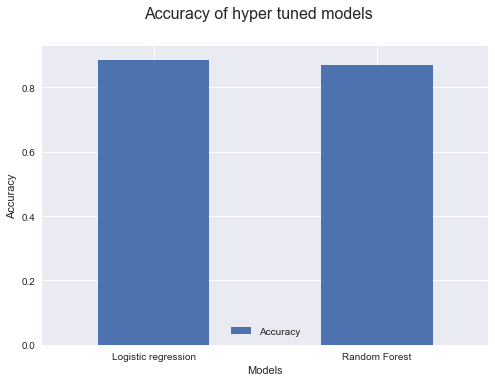

In [43]:
# plotting the scores
hyper_model.T.plot.bar()
plt.suptitle('Accuracy of hyper tuned models', fontsize=16)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.legend()
plt.xticks(rotation=0)
plt.show()

###### Note2
From the  graph above the `RandomForestClassifier` estimator improved it's accuracy to 86.88% after hyperparameter tuning with `RandomSearchcv`. But it's score is still lower than that of the `LogisticRegression's` **[baseline score](#Comparing-the-models)** and **[hyper-tuned](#Scores-after-Hyper-tuning)** score.


#### Hyperparameter tuning using GridSearchCV

In [44]:
# hyperparamter grid for both logistic regression
log_reg_grid = {'C': np.logspace(-4, 4, 30),
               'solver':['liblinear']
               }

gs_log_reg = GridSearchCV(LogisticRegression(),
                               param_grid=log_reg_grid,
                               cv = 5, 
                               verbose=True)
#fit model hyperparameter
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.7s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-04, 1.8...
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5

In [45]:
# get beast parameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [46]:
# evaluation 
gs_log_reg.score(X_test, y_test)

0.8852459016393442